In [178]:
import pandas as pd

file_path = r"parkinsons_updrs.data"
df = pd.read_csv(file_path)
df = df.astype('float64')
print(df.head())

   subject#   age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0       1.0  72.0  0.0     5.6431       28.199       34.398    0.00662   
1       1.0  72.0  0.0    12.6660       28.447       34.894    0.00300   
2       1.0  72.0  0.0    19.6810       28.695       35.389    0.00481   
3       1.0  72.0  0.0    25.6470       28.905       35.810    0.00528   
4       1.0  72.0  0.0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"parkinsons_updrs.data"
df = pd.read_csv(file_path)

# Basic Info
print(" Dataset shape:", df.shape)
print("\n Column names:\n", df.columns.tolist())
print("\n First few rows:")
print(df.head())

# Check for missing values
print("\n Missing values per column:\n", df.isnull().sum())

# Statistical summary
print("\n Statistical Summary:")
print(df.describe())



 Dataset shape: (5875, 22)

 Column names:
 ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

 First few rows:
   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [181]:
# Step 1: Drop target columns and optionally low-correlation features
X = df.drop(columns=['motor_UPDRS', 'total_UPDRS']) 
y = df['total_UPDRS']

# Step 2: Standardize the features (temporarily to maintain flow)
scaler_temp = StandardScaler()
X_scaled = scaler_temp.fit_transform(X)

# Convert X_scaled back to a DataFrame with the same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 3: First split: 80% train_val + 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42)

# Step 4: Second split: 75% train + 25% val from the 80% remaining
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)

# Step 5: Fit scaler only on the training set (from original scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 6: Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Check shapes (optional)
print("Train set size:", X_train_scaled.shape)
print("Validation set size:", X_val_scaled.shape)
print("Test set size:", X_test_scaled.shape)


Train set size: (3525, 20)
Validation set size: (1175, 20)
Test set size: (1175, 20)


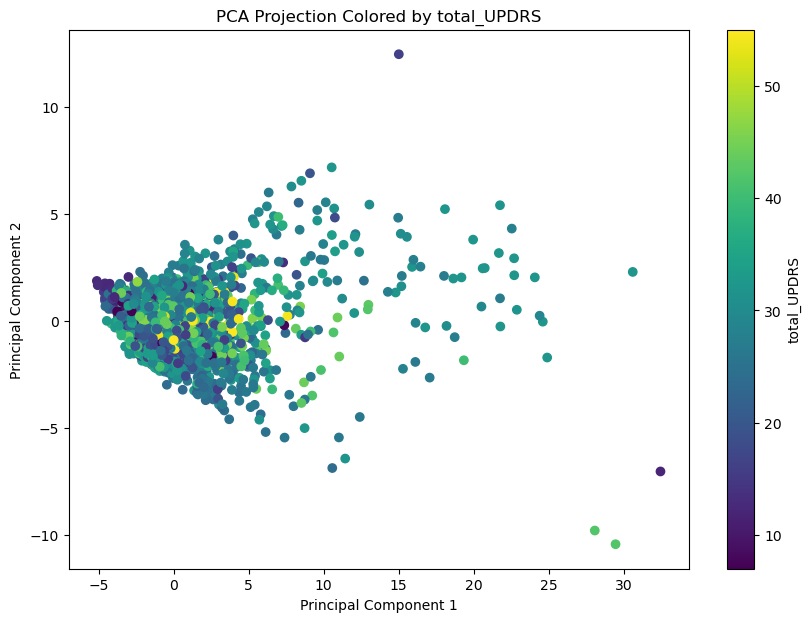

In [182]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Create scatter plot with colorbar
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection Colored by total_UPDRS')
cbar = plt.colorbar(scatter)
cbar.set_label('total_UPDRS')
plt.show()


# feature selection : 

In [183]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3525 entries, 222 to 706
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       3525 non-null   float64
 1   age            3525 non-null   float64
 2   sex            3525 non-null   float64
 3   test_time      3525 non-null   float64
 4   Jitter(%)      3525 non-null   float64
 5   Jitter(Abs)    3525 non-null   float64
 6   Jitter:RAP     3525 non-null   float64
 7   Jitter:PPQ5    3525 non-null   float64
 8   Jitter:DDP     3525 non-null   float64
 9   Shimmer        3525 non-null   float64
 10  Shimmer(dB)    3525 non-null   float64
 11  Shimmer:APQ3   3525 non-null   float64
 12  Shimmer:APQ5   3525 non-null   float64
 13  Shimmer:APQ11  3525 non-null   float64
 14  Shimmer:DDA    3525 non-null   float64
 15  NHR            3525 non-null   float64
 16  HNR            3525 non-null   float64
 17  RPDE           3525 non-null   float64
 18  DFA         

In [184]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Calculate mutual information
mi_scores = mutual_info_regression(X_train, y_train)

# Create a nicely formatted DataFrame
mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_df = mi_df.drop(columns=['test_time'])
# Display the result
print("Mutual Information (Information Gain) Scores:")
print(mi_df)


Mutual Information (Information Gain) Scores:
test_time        4.584644
subject#         2.887899
age              2.325888
sex              0.438215
DFA              0.201731
Jitter(Abs)      0.138476
HNR              0.124982
Jitter:PPQ5      0.114167
PPE              0.112672
Shimmer:APQ11    0.104780
Jitter(%)        0.096253
Jitter:RAP       0.094918
Jitter:DDP       0.094656
Shimmer          0.094567
Shimmer:APQ5     0.093297
Shimmer(dB)      0.093187
NHR              0.082389
RPDE             0.076311
Shimmer:APQ3     0.071785
Shimmer:DDA      0.071478
dtype: float64


In [185]:
print("Columns:", X_train.columns)
print("Index:", X_train.index)


Columns: Index(['subject#', 'age', 'sex', 'test_time', 'Jitter(%)', 'Jitter(Abs)',
       'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')
Index: Index([ 222, 5651, 1340, 3873, 5316, 2944, 5241, 3887,  383,  490,
       ...
        967, 4260, 3264, 4026, 4837, 1648,  376,  427, 1619,  706],
      dtype='int64', length=3525)


In [186]:
selected_features = mi_df[mi_df > 0.1].index.tolist()
print("Selected Features (MI > 0.1):")
print(selected_features)


Selected Features (MI > 0.1):
['test_time', 'subject#', 'age', 'sex', 'DFA', 'Jitter(Abs)', 'HNR', 'Jitter:PPQ5', 'PPE', 'Shimmer:APQ11']


In [187]:
# Ensure 'motor_UPDRS' is included in the DataFrame
if 'motor_UPDRS' not in selected_features:
    selected_features.append('motor_UPDRS')

# Create the subset DataFrame
selected_df = df[selected_features]

# Compute correlation matrix
correlation_matrix = selected_df.corr()

# Show correlations with motor_UPDRS
print("📊 Correlation with motor_UPDRS:\n")
print(correlation_matrix["motor_UPDRS"].sort_values(ascending=False))


📊 Correlation with motor_UPDRS:

motor_UPDRS      1.000000
age              0.273665
subject#         0.252919
PPE              0.162433
Shimmer:APQ11    0.136560
Jitter:PPQ5      0.076291
test_time        0.067918
Jitter(Abs)      0.050903
sex             -0.031205
DFA             -0.116242
HNR             -0.157029
Name: motor_UPDRS, dtype: float64


In [188]:

# Get correlation with 'motor_UPDRS'
motor_corr = correlation_matrix["motor_UPDRS"]

# Filter features with correlation >= 0.1 (excluding 'motor_UPDRS' itself)
strong_corr_features = motor_corr[abs(motor_corr) >= 0.1].index.tolist()

# Optional: remove the target itself if you only want features
strong_corr_features = [f for f in strong_corr_features if f != 'motor_UPDRS']

# Create a new DataFrame with only the strongly correlated features + target
selected_df_train = X_train[strong_corr_features]
selected_df_val = X_val[strong_corr_features]
selected_df_test  = X_test[strong_corr_features]



In [189]:
selected_df_train['Jitter(%)'] = X_train['Jitter(%)'] 
selected_df_val['Jitter(%)'] = X_val['Jitter(%)'] 
selected_df_test['Jitter(%)'] = X_test['Jitter(%)'] 

C:\Users\nesri\AppData\Local\Temp\ipykernel_8300\3021866720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df_train['Jitter(%)'] = X_train['Jitter(%)']
C:\Users\nesri\AppData\Local\Temp\ipykernel_8300\3021866720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df_val['Jitter(%)'] = X_val['Jitter(%)']
C:\Users\nesri\AppData\Local\Temp\ipykernel_8300\3021866720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [190]:

print("Remaining features:")
print(selected_df_train.columns)


Remaining features:
Index(['subject#', 'age', 'DFA', 'HNR', 'PPE', 'Shimmer:APQ11', 'Jitter(%)'], dtype='object')


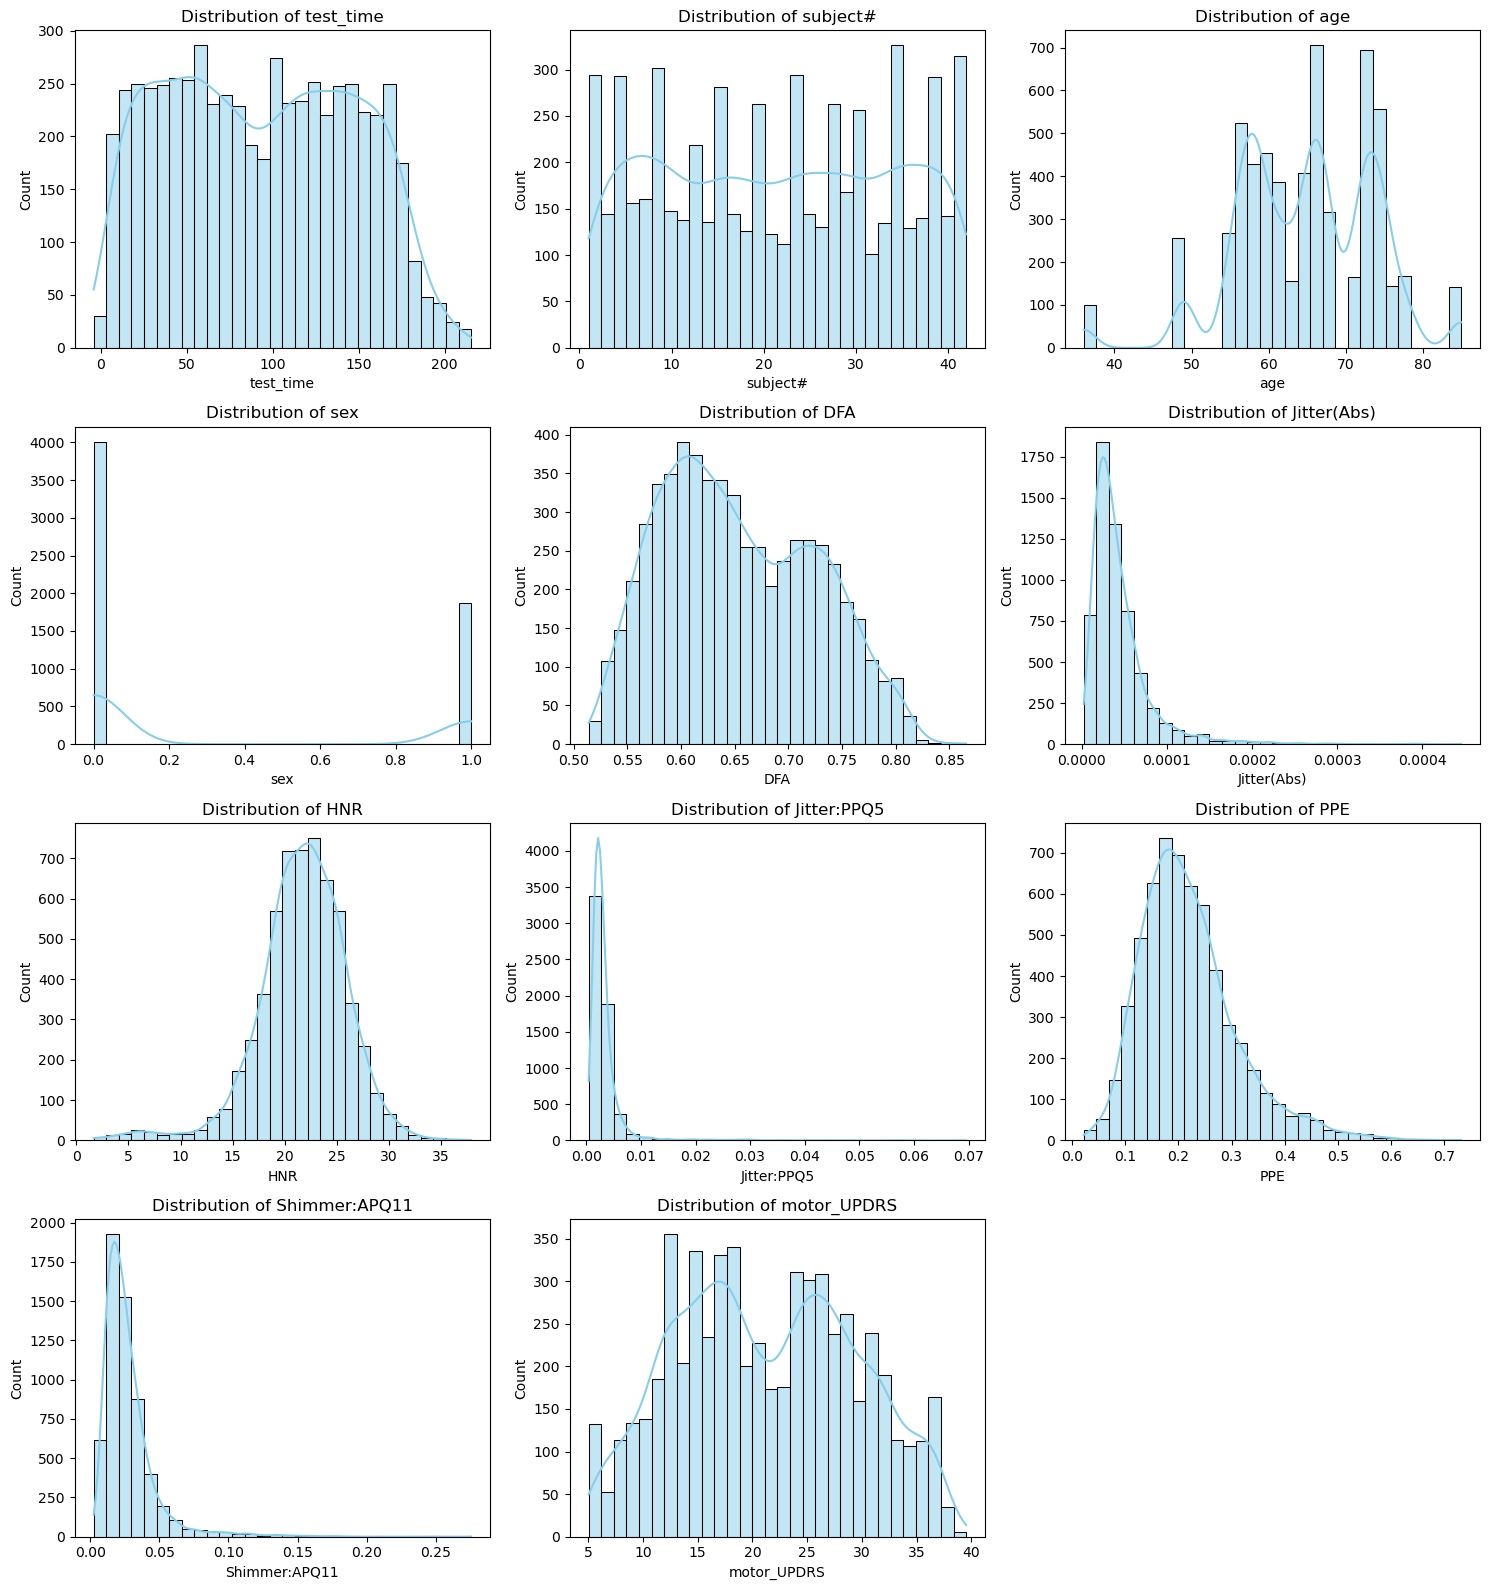

In [191]:
# Set up the plot grid
num_features = selected_df.shape[1]
cols = 3  # Number of columns per row
rows = (num_features + cols - 1) // cols  # Calculate needed rows

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(selected_df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(selected_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [192]:
summaries = selected_df_train.groupby('subject#').agg(['mean', 'std', 'min', 'max', 'median'])
summaries

age                                          DFA            \
               mean  std       min       max    median      mean       std   
subject#                                                                     
-1.656596  0.815695  0.0  0.815695  0.815695  0.815695 -1.362496  0.317148   
-1.575764 -0.771467  0.0 -0.771467 -0.771467 -0.771467  1.478868  0.409680   
-1.494931 -0.884836  0.0 -0.884836 -0.884836 -0.884836 -1.171352  0.257929   
-1.414098  1.042433  0.0  1.042433  1.042433  1.042433 -0.278099  0.419788   
-1.333265  1.155802  0.0  1.155802  1.155802  1.155802 -0.237112  0.446845   
-1.252433 -0.204623  0.0 -0.204623 -0.204623 -0.204623 -0.132178  0.445518   
-1.171600  0.815695  0.0  0.815695  0.815695  0.815695 -0.818009  0.428979   
-1.090767  0.929064  0.0  0.929064  0.929064  0.929064 -0.231083  0.666761   
-1.009934  0.362220  0.0  0.362220  0.362220  0.362220  1.441786  0.500309   
-0.929102 -0.771467  0.0 -0.771467 -0.771467 -0.771467 -0.245958  0.646838   
-0.848269 -1.111573  0.0 -1.111573 -1.111573 -1.111573 -0.522388  0.681038   
-0.767436 -0.317992  0.0 -0.317992 -0.317992 -0.317992 -0.722126  0.443983   
-0.686604  0.929064  0.0  0.929064  0.929064  0.929064 -0.929839  0.432195   
-0.605771 -0.771467  0.0 -0.771467 -0.771467 -0.771467 -0.401187  0.662941   
-0.524938  0.022114  0.0  0.022114  0.022114  0.022114 -0.876601  0.717625   
-0.444105  0.022114  0.0  0.022114  0.022114  0.022114  0.639107  0.362323   
-0.363273  0.135483  0.0  0.135483  0.135483  0.135483 -0.740007  0.356297   
-0.282440  0.022114  0.0  0.022114  0.022114  0.022114 -0.225828  0.535012   
-0.201607 -1.111573  0.0 -1.111573 -1.111573 -1.111573  0.967420  0.416540   
-0.120774  0.248852  0.0  0.248852  0.248852  0.248852  1.714108  0.518184   
-0.039942  0.929064  0.0  0.929064  0.929064  0.929064 -0.139838  0.517516   
 0.040891 -0.884836  0.0 -0.884836 -0.884836 -0.884836 -0.377827  0.653626   
 0.121724 -0.658098  0.0 -0.658098 -0.658098 -0.658098  0.500154  0.474624   
 0.202557 -0.544730  0.0 -0.544730 -0.544730 -0.544730  1.304197  0.351240   
 0.283389  1.269170  0.0  1.269170  1.269170  1.269170 -0.962998  0.345188   
 0.364222 -1.791786  0.0 -1.791786 -1.791786 -1.791786  0.704802  0.480027   
 0.445055 -0.884836  0.0 -0.884836 -0.884836 -0.884836  1.039994  0.419482   
 0.525887  1.042433  0.0  1.042433  1.042433  1.042433  1.019565  0.352464   
 0.606720  1.495908  0.0  1.495908  1.495908  1.495908 -0.332608  0.375715   
 0.687553 -1.791786  0.0 -1.791786 -1.791786 -1.791786  0.888411  0.613420   
 0.768386  1.155802  0.0  1.155802  1.155802  1.155802  1.866600  0.274871   
 0.849218 -3.265580  0.0 -3.265580 -3.265580 -3.265580 -0.586248  0.773411   
 0.930051  0.135483  0.0  0.135483  0.135483  0.135483 -1.278571  0.427844   
 1.010884 -0.658098  0.0 -0.658098 -0.658098 -0.658098  1.025443  0.433735   
 1.091717  0.702327  0.0  0.702327  0.702327  0.702327  1.047081  0.318106   
 1.172549 -0.317992  0.0 -0.317992 -0.317992 -0.317992 -0.693294  0.415625   
 1.253382 -0.998205  0.0 -0.998205 -0.998205 -0.998205 -0.778244  0.543638   
 1.334215  0.248852  0.0  0.248852  0.248852  0.248852 -0.355616  0.366390   
 1.415047  0.135483  0.0  0.135483  0.135483  0.135483 -0.668340  0.491170   
 1.495880  2.289489  0.0  2.289489  2.289489  2.289489 -0.608389  0.404041   
 1.576713  0.362220  0.0  0.362220  0.362220  0.362220  0.455511  0.496944   
 1.657546 -0.431361  0.0 -0.431361 -0.431361 -0.431361 -0.737063  0.456837   

                                         ... Shimmer:APQ11            \
                min       max    median  ...          mean       std   
subject#                                 ...                           
-1.656596 -1.866392 -0.524990 -1.436466  ...     -0.532749  0.384825   
-1.575764  0.391423  2.229892  1.549176  ...      0.194563  0.573967   
-1.494931 -1.661021 -0.562651 -1.176790  ...     -0.792464  0.286773   
-1.414098 -0.950684  0.885951 -0.339366  ...      0.594137  1.075775   
-

In [193]:
selected_df_train = selected_df_train.drop(columns=['subject#'])
selected_df_val =  selected_df_val.drop(columns=[ 'subject#'])
selected_df_test =  selected_df_test.drop(columns=[ 'subject#'])

# KNN :

In [194]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(selected_df_train, y_train)

importances = rf.feature_importances_
weights = importances / importances.sum()
print(weights)
print(selected_df_train.columns)

[0.68594367 0.14981532 0.06266281 0.02888779 0.0456588  0.02703161]
Index(['age', 'DFA', 'HNR', 'PPE', 'Shimmer:APQ11', 'Jitter(%)'], dtype='object')


In [195]:
import numpy as np
# Example: custom weighted distance
def weighted_euclidean(x, y, weights):
    return np.sqrt(np.sum(weights * (x - y) ** 2))




In [196]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [197]:
selected_df_train

,age,DFA,HNR,PPE,Shimmer:APQ11,Jitter(%)
222,-0.771467,0.974673,1.187095,-0.885218,-0.681073,-0.530564
5651,0.362220,0.640521,-1.375172,2.791659,1.220406,2.097575
1340,0.362220,0.696659,0.303096,1.325062,-0.596507,0.232272
3873,1.495908,-0.691149,0.868035,0.066682,0.141567,-0.359860
5316,0.135483,-0.718090,1.625948,-1.421873,-0.847202,-0.681709
...,...,...,...,...,...,...
1648,-0.317992,-0.926705,0.139255,-0.435664,-0.337806,-0.128697
376,-0.884836,-0.835304,1.470030,-0.865871,-1.104902,-0.687044
427,-0.884836,-1.509813,-0.115480,-0.329751,-0.192193,-0.457659
1619,-1.111573,-1.354938,0.557831,-0.828163,-0.333302,-0.473663


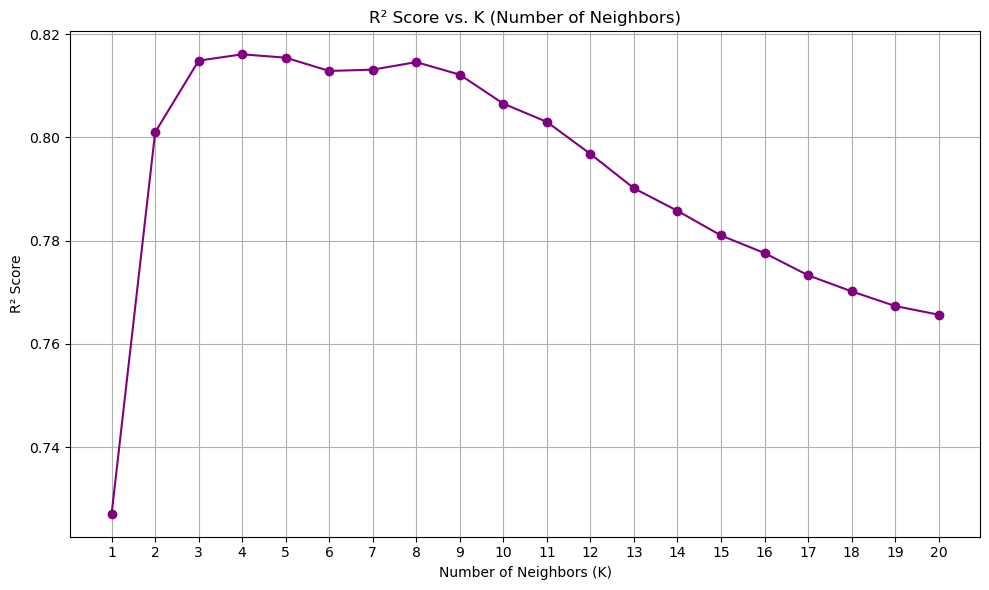

In [198]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# List to store R² scores
r2_scores = []

# Try k values from 1 to 20
k_values = range(1, 21)
for k in k_values:

    knn = KNeighborsRegressor(
    n_neighbors=k,
    weights='distance',
    metric=weighted_euclidean,
    metric_params={"weights": weights}
    )
    
    knn.fit(selected_df_train, y_train)
    y_pred_k = knn.predict(selected_df_val)
    r2 = r2_score(y_val, y_pred_k)
    r2_scores.append(r2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o', linestyle='-', color='purple')
plt.title('R² Score vs. K (Number of Neighbors)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


In [199]:

# Scale while keeping DataFrame structure
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Now you can select columns by name
X_train_selected = X_train_scaled.loc[:, X_train_scaled.columns.isin(selected_df.columns)]
X_test_selected = X_test_scaled.loc[:, X_test_scaled.columns.isin(selected_df.columns)]



# Step 3: Grid search for best k
param_grid = {'n_neighbors': list(range(1, 21))}  # try k from 1 to 20
knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"✅ Best k: {best_k}")



✅ Best k: 4


# 4-NN

In [200]:
# Step 4: Train final model
best_knn = KNeighborsRegressor(n_neighbors=4)
best_knn.fit(selected_df_train, y_train)

# Step 5: Evaluate on test set
y_pred = best_knn.predict(selected_df_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error on Test Set: {mse:.3f}")
print(f"📈 R² Score on Test Set: {r2:.3f}")

📉 Mean Squared Error on Test Set: 52.679
📈 R² Score on Test Set: 0.525


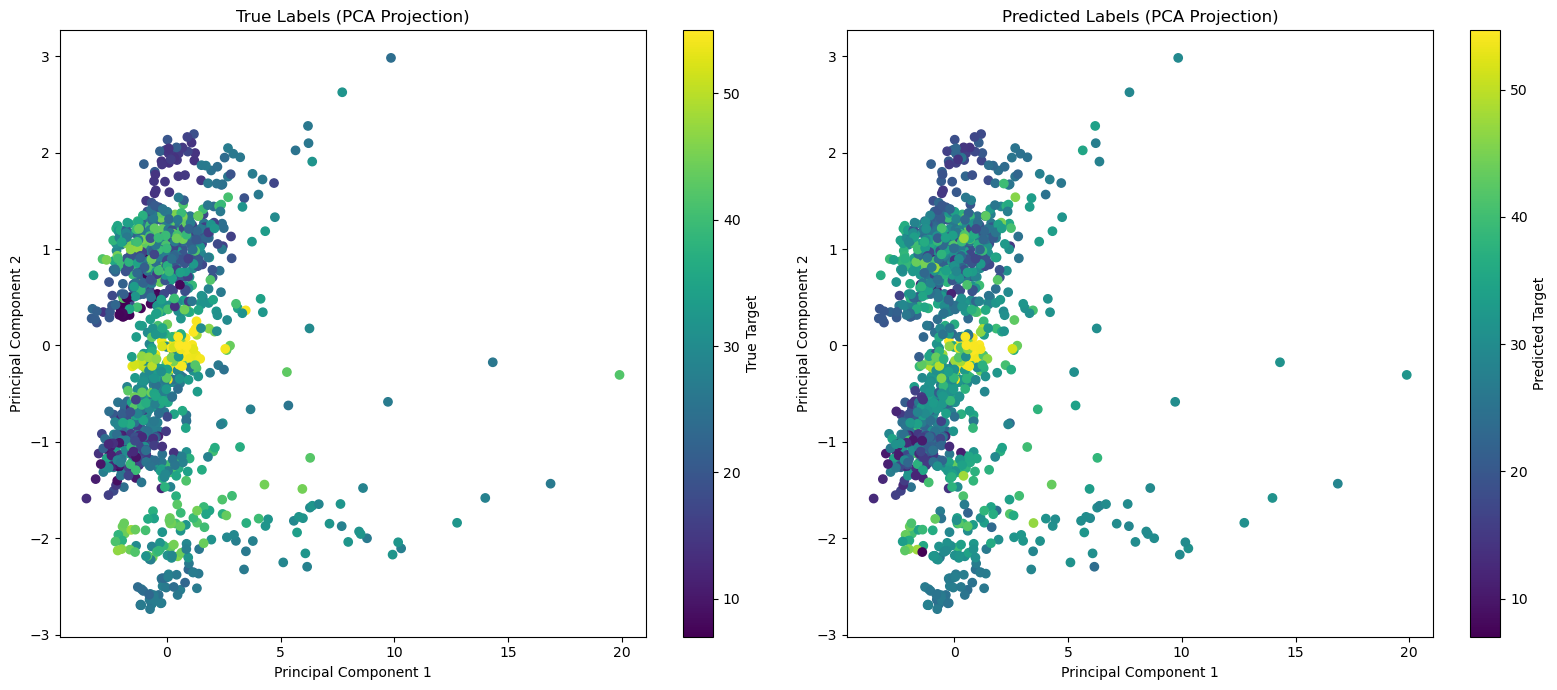

In [201]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA on the test features
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_selected)

# Create side-by-side plots
plt.figure(figsize=(16, 7))

# --- True Labels Plot ---
plt.subplot(1, 2, 1)
scatter_true = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.title('True Labels (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar_true = plt.colorbar(scatter_true)
cbar_true.set_label('True Target')

# --- Predicted Labels Plot ---
plt.subplot(1, 2, 2)
scatter_pred = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('Predicted Labels (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar_pred = plt.colorbar(scatter_pred)
cbar_pred.set_label('Predicted Target')

plt.tight_layout()
plt.show()


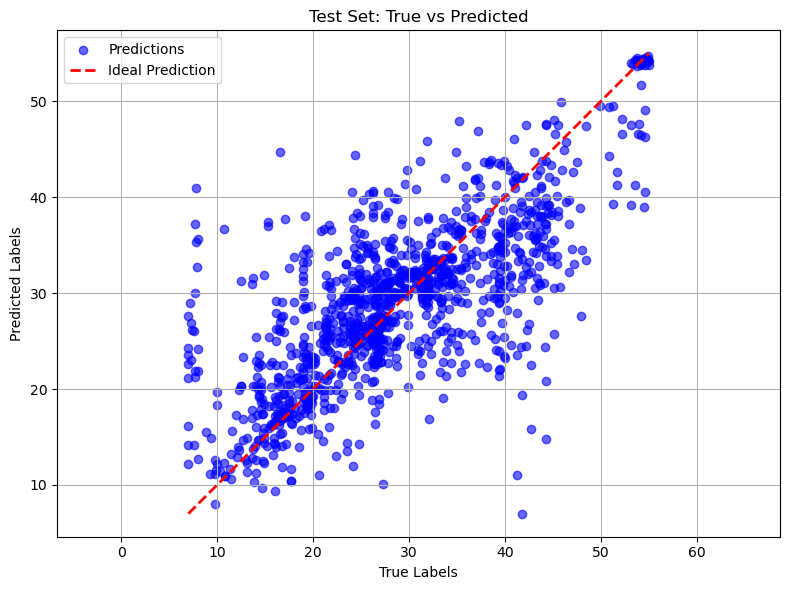

In [202]:
import matplotlib.pyplot as plt

# Scatter plot: True vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

plt.title('Test Set: True vs Predicted')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


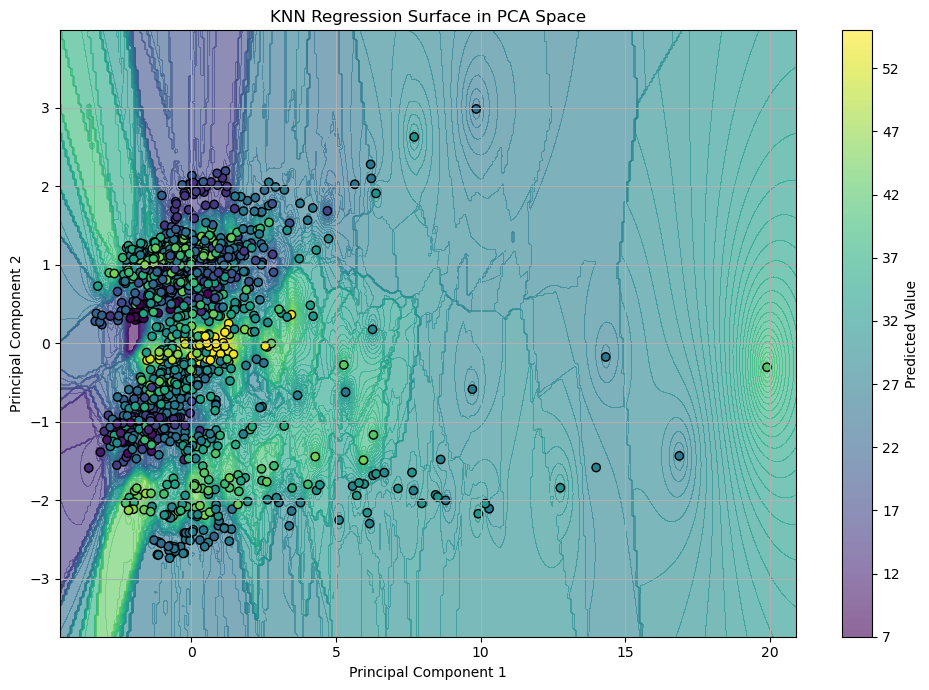

In [203]:

knn_vis = KNeighborsRegressor(n_neighbors=5 ,  weights='distance')
knn_vis.fit(X_test_pca, y_test)  # You can also fit on train PCA if you prefer

# 2. Create a meshgrid over the 2D PCA space
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# 3. Predict on the mesh grid using your regressor
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_vis.predict(grid_points)
Z = Z.reshape(xx.shape)

# 4. Plot the regression surface
plt.figure(figsize=(10, 7))
contour = plt.contourf(xx, yy, Z, levels=100, cmap='viridis', alpha=0.6)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap='viridis')
plt.title('KNN Regression Surface in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(contour)
cbar.set_label('Predicted Value')
plt.grid(True)
plt.tight_layout()
plt.show()


# 12-NN

In [204]:
# Step 4: Train final model
best_knn = KNeighborsRegressor(n_neighbors=12 ,  weights='distance')
best_knn.fit(selected_df_train, y_train)

# Step 5: Evaluate on test set
y_pred = best_knn.predict(selected_df_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error on Test Set: {mse:.3f}")
print(f"📈 R² Score on Test Set: {r2:.3f}")

📉 Mean Squared Error on Test Set: 49.721
📈 R² Score on Test Set: 0.551


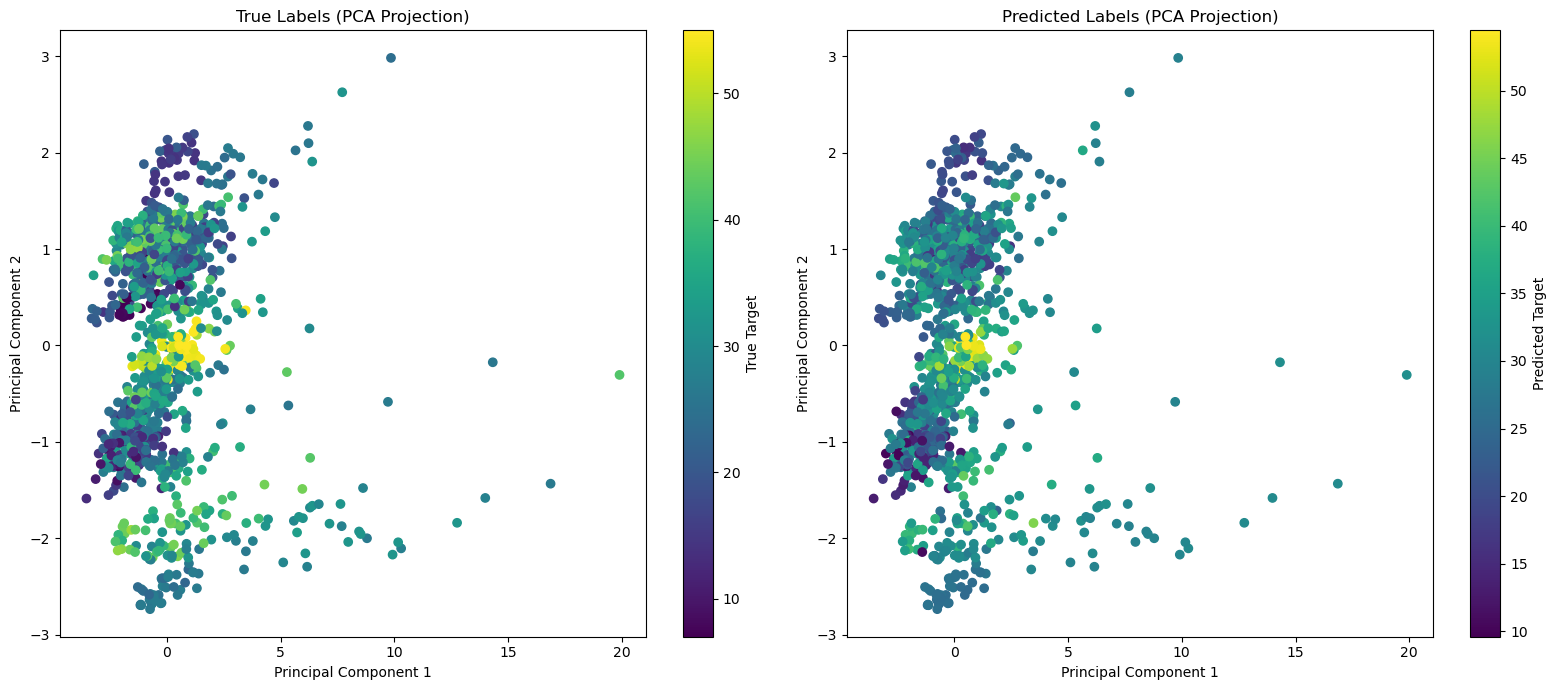

In [205]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA on the test features
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_selected)

# Create side-by-side plots
plt.figure(figsize=(16, 7))

# --- True Labels Plot ---
plt.subplot(1, 2, 1)
scatter_true = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.title('True Labels (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar_true = plt.colorbar(scatter_true)
cbar_true.set_label('True Target')

# --- Predicted Labels Plot ---
plt.subplot(1, 2, 2)
scatter_pred = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('Predicted Labels (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar_pred = plt.colorbar(scatter_pred)
cbar_pred.set_label('Predicted Target')

plt.tight_layout()
plt.show()

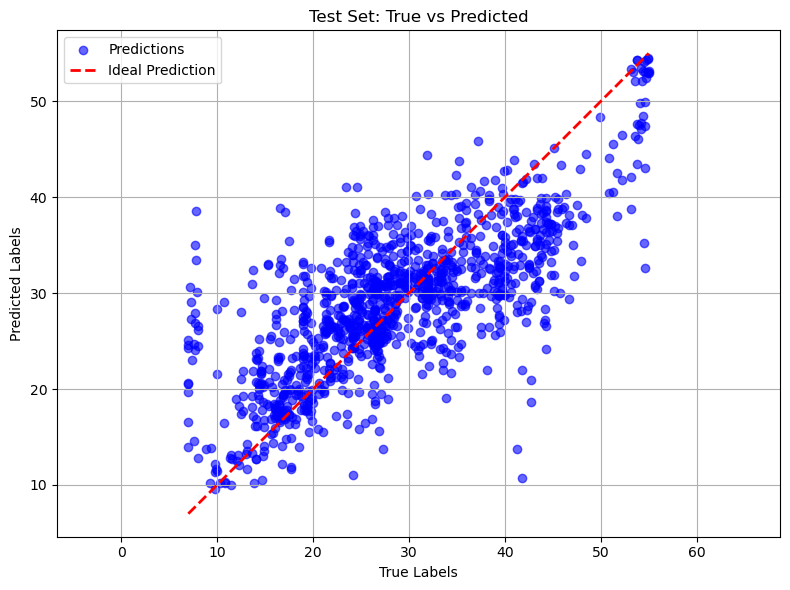

In [206]:
import matplotlib.pyplot as plt

# Scatter plot: True vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

plt.title('Test Set: True vs Predicted')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


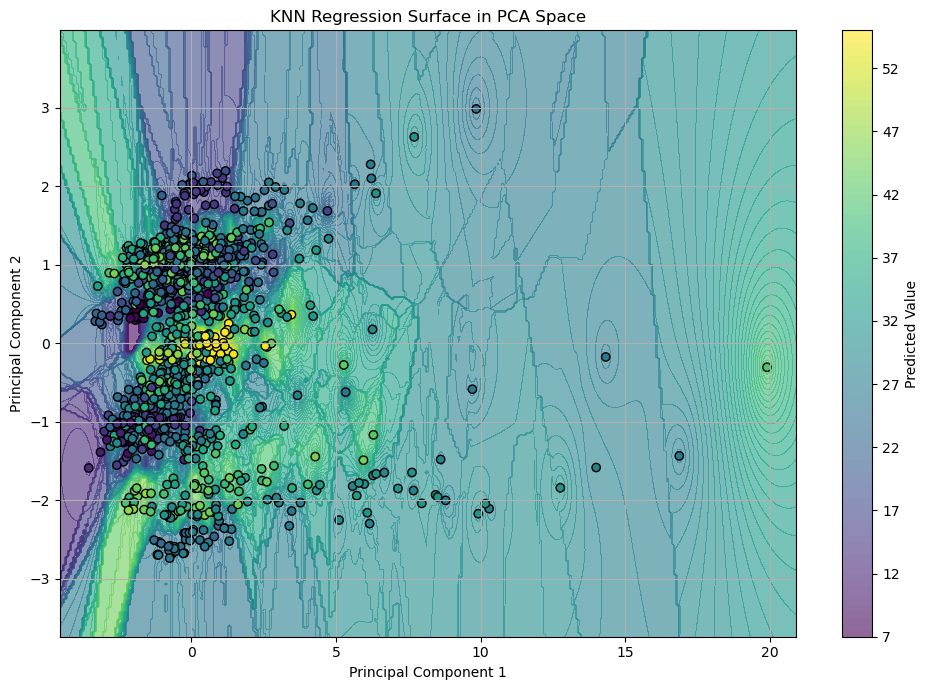

In [207]:

knn_vis = KNeighborsRegressor(n_neighbors=4 ,  weights='distance')
knn_vis.fit(X_test_pca, y_test)  # You can also fit on train PCA if you prefer

# 2. Create a meshgrid over the 2D PCA space
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# 3. Predict on the mesh grid using your regressor
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_vis.predict(grid_points)
Z = Z.reshape(xx.shape)

# 4. Plot the regression surface
plt.figure(figsize=(10, 7))
contour = plt.contourf(xx, yy, Z, levels=100, cmap='viridis', alpha=0.6)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap='viridis')
plt.title('KNN Regression Surface in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(contour)
cbar.set_label('Predicted Value')
plt.grid(True)
plt.tight_layout()
plt.show()
